In [90]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import ks_2samp
import plotly.express as px
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [91]:
df = pd.read_csv('Data/ballbyball.csv')

In [92]:
df.shape

(54168, 25)

In [93]:
df.head()

,index,match_id,inningNumber,overNumber,ballNumber,oversUnique,oversActual,batsmanPlayerId,bowlerPlayerId,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,penalties,run,batsmanRuns,totalRuns,totalWickets,outPlayerId,shotType
0,0,100706,1,1,1,0.01,0.1,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,DEFENDED
1,1,100706,1,1,2,0.02,0.2,52584,87127,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,CUT_SHOT
2,2,100706,1,1,3,0.03,0.3,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,DEFENDED
3,3,100706,1,1,4,0.04,0.4,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,False,0,0,0,0,0,0,0,0,0,NaN,FLICK
4,4,100706,1,1,5,0.05,0.5,52584,87127,ON_THE_STUMPS,GOOD_LENGTH,False,False,True,0,0,0,0,0,0,0,0,1,52584.0,COVER_DRIVE


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54168 entries, 0 to 54167
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            54168 non-null  int64  
 1   match_id         54168 non-null  int64  
 2   inningNumber     54168 non-null  int64  
 3   overNumber       54168 non-null  int64  
 4   ballNumber       54168 non-null  int64  
 5   oversUnique      54168 non-null  float64
 6   oversActual      54168 non-null  float64
 7   batsmanPlayerId  54168 non-null  int64  
 8   bowlerPlayerId   54168 non-null  int64  
 9   pitchLine        27588 non-null  object 
 10  pitchLength      27592 non-null  object 
 11  isFour           54168 non-null  bool   
 12  isSix            54168 non-null  bool   
 13  isWicket         54168 non-null  bool   
 14  byes             54168 non-null  int64  
 15  legbyes          54168 non-null  int64  
 16  wides            54168 non-null  int64  
 17  noballs     

In [95]:
df.loc[df.duplicated()]

,index,match_id,inningNumber,overNumber,ballNumber,oversUnique,oversActual,batsmanPlayerId,bowlerPlayerId,pitchLine,pitchLength,isFour,isSix,isWicket,byes,legbyes,wides,noballs,penalties,run,batsmanRuns,totalRuns,totalWickets,outPlayerId,shotType


In [96]:
df_cleaned = df.dropna(subset=['pitchLength', 'pitchLine','shotType'])

In [97]:
unique_count = df['batsmanPlayerId'].nunique()

print(unique_count)

604


In [98]:
df_cleaned.shape

(27383, 25)

In [99]:
match_counts_original = df['match_id'].value_counts()
match_counts_cleaned = df_cleaned['match_id'].value_counts()

comparison = match_counts_original.to_frame(name='original_count').join(
    match_counts_cleaned.to_frame(name='cleaned_count'), how='outer'
).fillna(0).astype(int)

comparison['difference'] = comparison['original_count'] - comparison['cleaned_count']

changed_match_ids = comparison[(comparison['difference'] != 0) & 
                               (comparison['difference'] != comparison['original_count'])][['original_count', 'cleaned_count','difference']]

print(changed_match_ids)


          original_count  cleaned_count  difference
match_id                                           
74933                251            243           8
74935                244            242           2
74937                249            245           4
74939                246            240           6
74941                233            232           1
...                  ...            ...         ...
103243               234            233           1
103244               237            230           7
103245               238            234           4
103246               222            221           1
103247               245            244           1

[98 rows x 3 columns]


In [100]:
changed_match_ids['difference'].value_counts()

difference
1      31
2      27
3      14
4      11
5       6
6       4
8       2
7       2
151     1
Name: count, dtype: int64

In [101]:
match_id_with_151 = changed_match_ids[changed_match_ids['difference'] == 151].index
print(match_id_with_151)

Index([100728], dtype='int64', name='match_id')


In [102]:
df_cleaned = df_cleaned[df_cleaned['match_id'] != match_id_with_151[0]]

In [103]:
df_cleaned.shape

(27284, 25)

In [104]:
print(df_cleaned.columns)

Index(['index', 'match_id', 'inningNumber', 'overNumber', 'ballNumber',
       'oversUnique', 'oversActual', 'batsmanPlayerId', 'bowlerPlayerId',
       'pitchLine', 'pitchLength', 'isFour', 'isSix', 'isWicket', 'byes',
       'legbyes', 'wides', 'noballs', 'penalties', 'run', 'batsmanRuns',
       'totalRuns', 'totalWickets', 'outPlayerId', 'shotType'],
      dtype='object')


In [105]:
df_cleaned = df_cleaned.drop(columns=['index', 'match_id','overNumber','ballNumber','oversUnique','penalties'])

In [106]:
df_cleaned.shape

(27284, 19)

/tmp/ipykernel_9375/3567145887.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Original", shade=True)
/tmp/ipykernel_9375/3567145887.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned[col], label="After Deletion", shade=True)


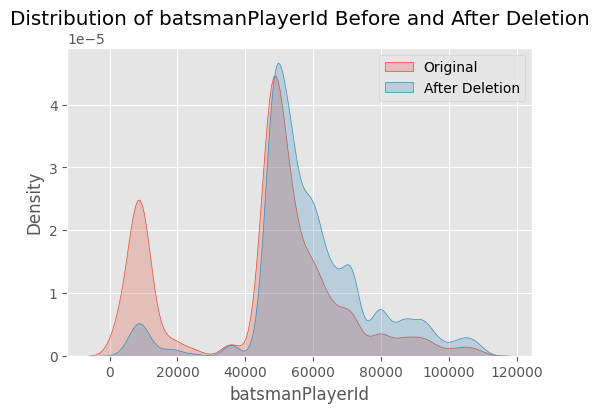

/tmp/ipykernel_9375/3567145887.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Original", shade=True)
/tmp/ipykernel_9375/3567145887.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned[col], label="After Deletion", shade=True)


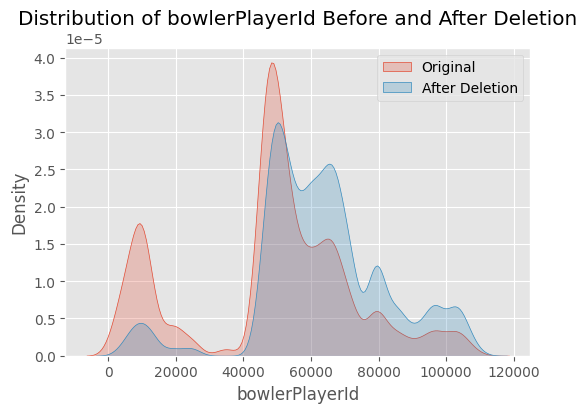

/tmp/ipykernel_9375/3567145887.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], label="Original", shade=True)
/tmp/ipykernel_9375/3567145887.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned[col], label="After Deletion", shade=True)


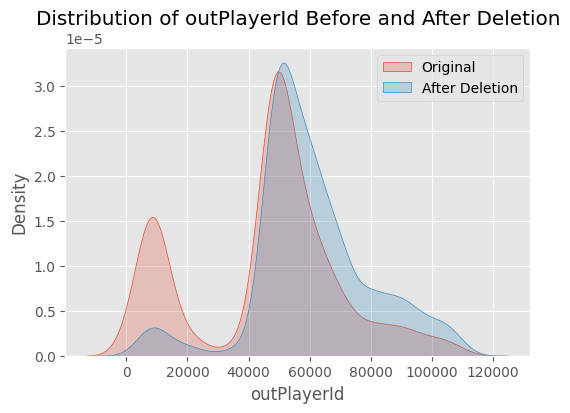

Columns with significant distribution change (p-value < 0.05):
['batsmanPlayerId', 'bowlerPlayerId', 'outPlayerId']


In [107]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns  
significantly_changed_cols = []

for col in numeric_cols:
    stat, p_value = ks_2samp(df[col].dropna(), df_cleaned[col].dropna())
    
    if p_value < 0.05:
        significantly_changed_cols.append(col)
        
        plt.figure(figsize=(6, 4))
        sns.kdeplot(df[col], label="Original", shade=True)
        sns.kdeplot(df_cleaned[col], label="After Deletion", shade=True)
        plt.title(f"Distribution of {col} Before and After Deletion")
        plt.legend()
        plt.show()

if significantly_changed_cols:
    print("Columns with significant distribution change (p-value < 0.05):")
    print(significantly_changed_cols)
else:
    print("No columns show significant distribution change.")

In [108]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

numerical_summary = df_cleaned[numerical_cols].describe().T
numerical_summary["skewness"] = df_cleaned[numerical_cols].skew()
numerical_summary["kurtosis"] = df_cleaned[numerical_cols].kurtosis()

print("\nNumerical Summary Statistics:\n")
print(numerical_summary)

categorical_summary = pd.DataFrame({
    "unique_values": df_cleaned[categorical_cols].nunique(),
    "most_frequent_value": df_cleaned[categorical_cols].mode().iloc[0],
    "most_frequent_count": df_cleaned[categorical_cols].apply(lambda x: x.value_counts().iloc[0]),
})

print("\nCategorical Summary Statistics:\n")
print(categorical_summary)

print("\nTop 5 Most Common Categories Per Categorical Column:\n")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df_cleaned[col].value_counts().head(5))



Numerical Summary Statistics:

                   count          mean           std     min      25%  \
inningNumber     27284.0      1.473794      0.499322     1.0      1.0   
oversActual      27284.0      9.360156      5.641233     0.1      4.4   
batsmanPlayerId  27284.0  58837.114976  18385.384943  4169.0  49112.0   
bowlerPlayerId   27284.0  63004.778112  19991.584484  4169.0  51092.0   
byes             27284.0      0.006048      0.130130     0.0      0.0   
legbyes          27284.0      0.022871      0.196712     0.0      0.0   
wides            27284.0      0.035772      0.233622     0.0      0.0   
noballs          27284.0      0.004471      0.072005     0.0      0.0   
run              27284.0      1.210380      1.506968     0.0      0.0   
batsmanRuns      27284.0      1.141218      1.516986     0.0      0.0   
totalRuns        27284.0     67.177063     44.347666     0.0     30.0   
totalWickets     27284.0      2.647192      2.214299     0.0      1.0   
outPlayerId       1

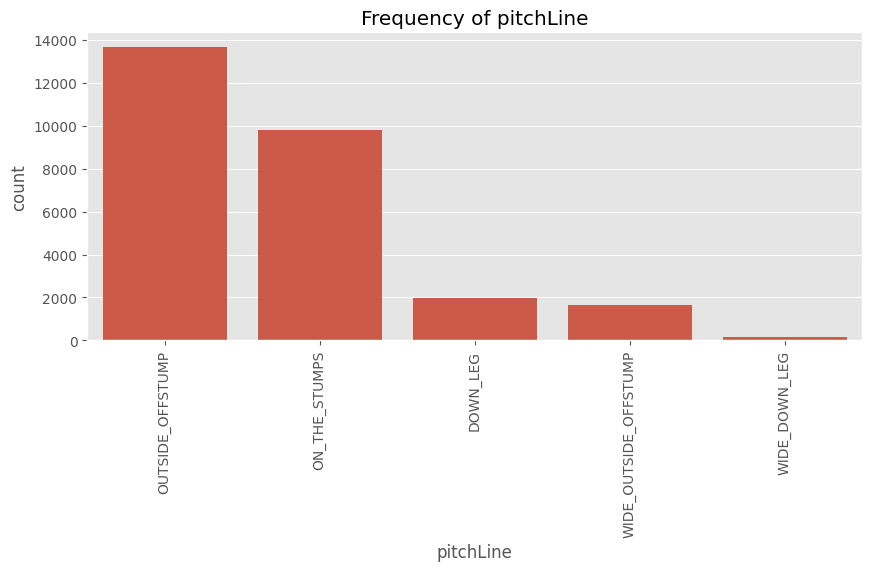

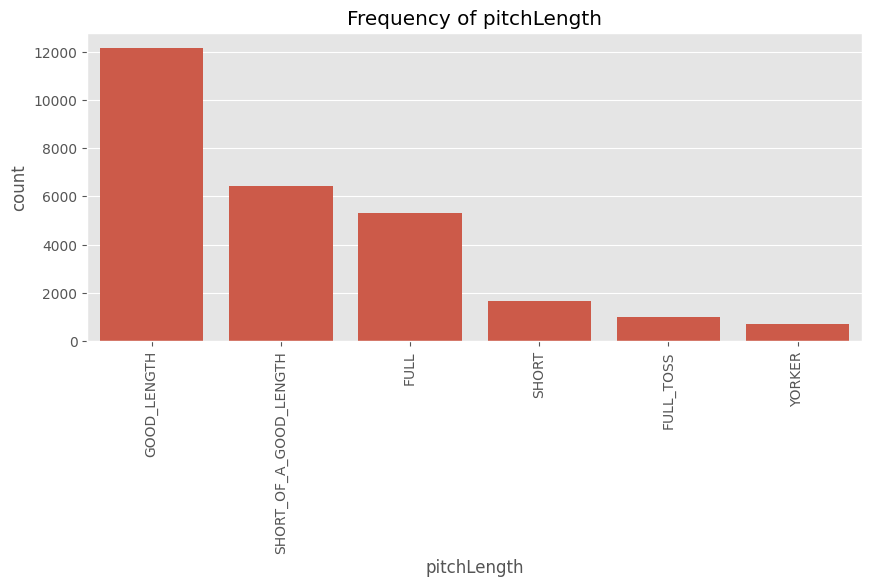

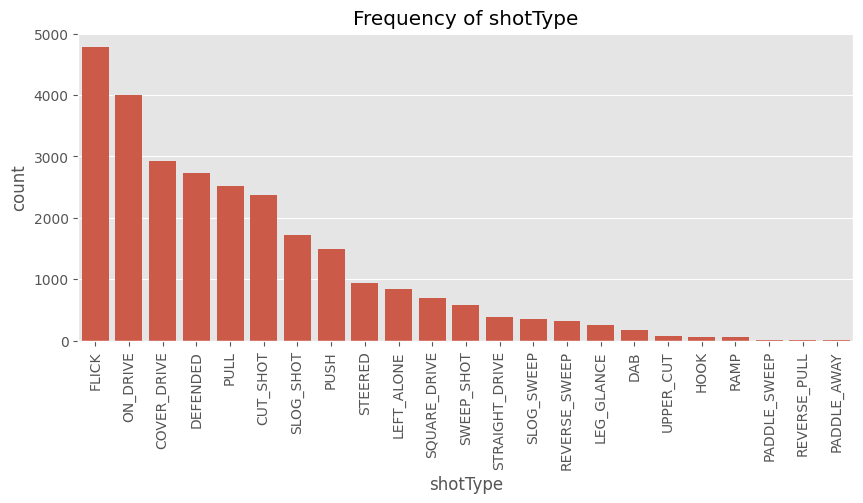

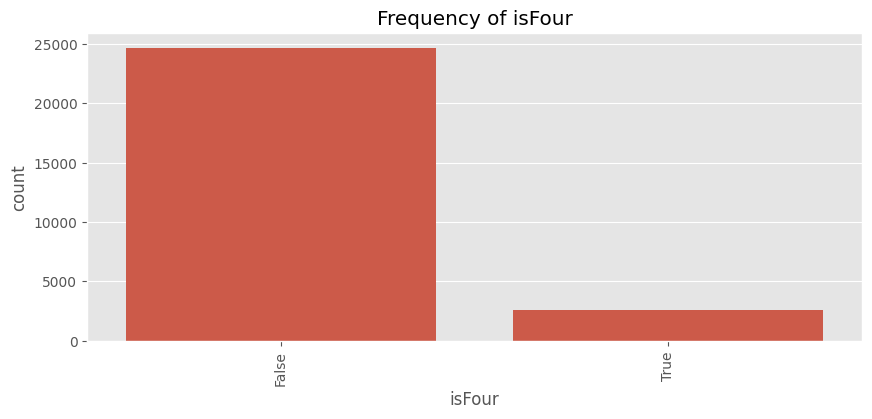

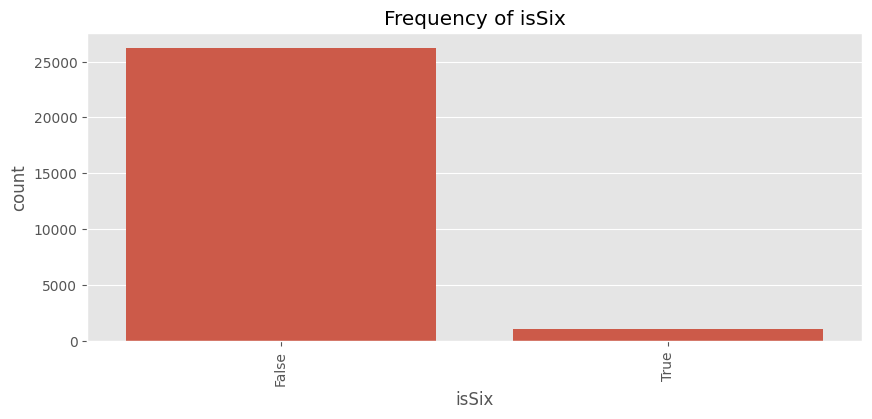

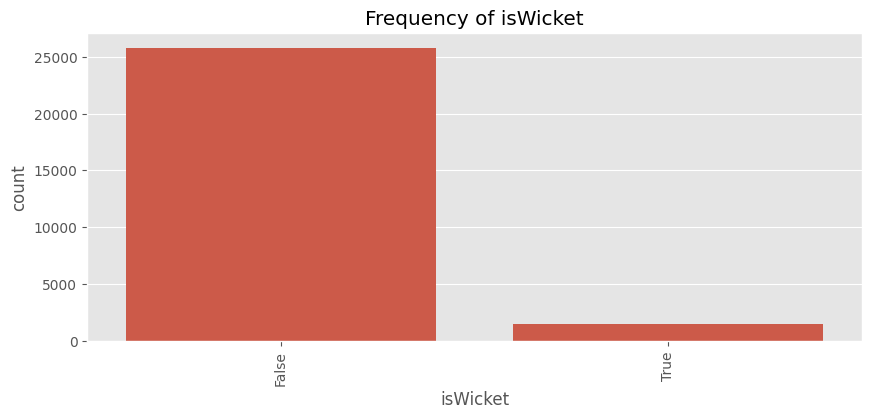

In [109]:
categorical_cols = ['pitchLine', 'pitchLength', 'shotType','isFour','isSix','isWicket']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df_cleaned[col], order=df_cleaned[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=90)
    plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

df_transformed = df_cleaned.copy()

numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

scaler = StandardScaler()
df_transformed[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

label_encoders = {}
for col in categorical_cols:
    if df_cleaned[col].nunique() <= 10:
        le = LabelEncoder()
        df_transformed[col] = le.fit_transform(df_cleaned[col])
        label_encoders[col] = le

df_transformed = pd.get_dummies(df_transformed, columns=[col for col in categorical_cols if col not in label_encoders], drop_first=True)

skewed_cols = df_cleaned[numerical_cols].apply(lambda x: x.skew()).abs() > 1
for col in numerical_cols[skewed_cols]:
    df_transformed[col] = np.log1p(df_cleaned[col])

print("\nData Transformation Complete!")
print(df_transformed.head())



Data Transformation Complete!
   inningNumber  oversActual  batsmanPlayerId  bowlerPlayerId  pitchLine  \
0     -0.948893    -1.641543         -0.34012        1.206641          1   
1     -0.948893    -1.623816         -0.34012        1.206641          1   
2     -0.948893    -1.606089         -0.34012        1.206641          1   
3     -0.948893    -1.588362         -0.34012        1.206641          1   
4     -0.948893    -1.570635         -0.34012        1.206641          1   

   pitchLength  isFour  isSix  isWicket  byes  legbyes  wides  noballs  run  \
0            2   False  False     False   0.0      0.0    0.0      0.0  0.0   
1            4   False  False     False   0.0      0.0    0.0      0.0  0.0   
2            2   False  False     False   0.0      0.0    0.0      0.0  0.0   
3            2   False  False     False   0.0      0.0    0.0      0.0  0.0   
4            2   False  False      True   0.0      0.0    0.0      0.0  0.0   

   batsmanRuns  totalRuns  totalWicke

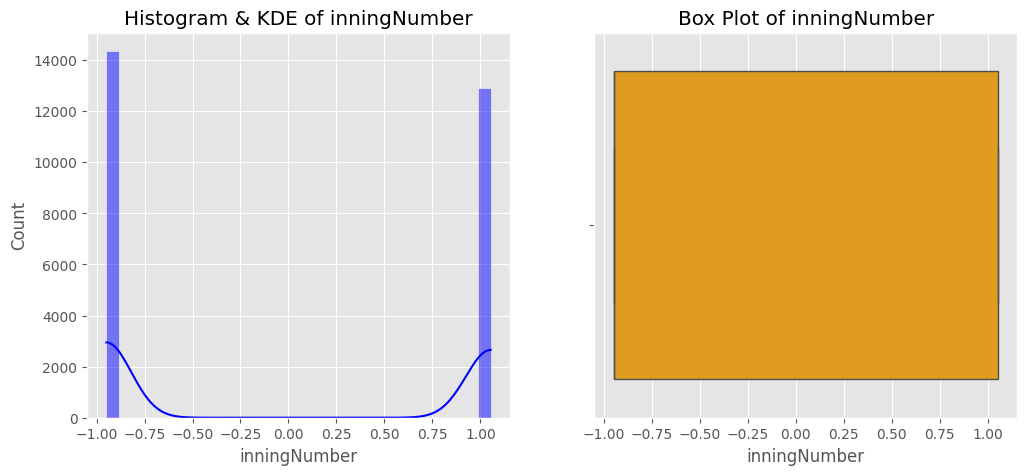

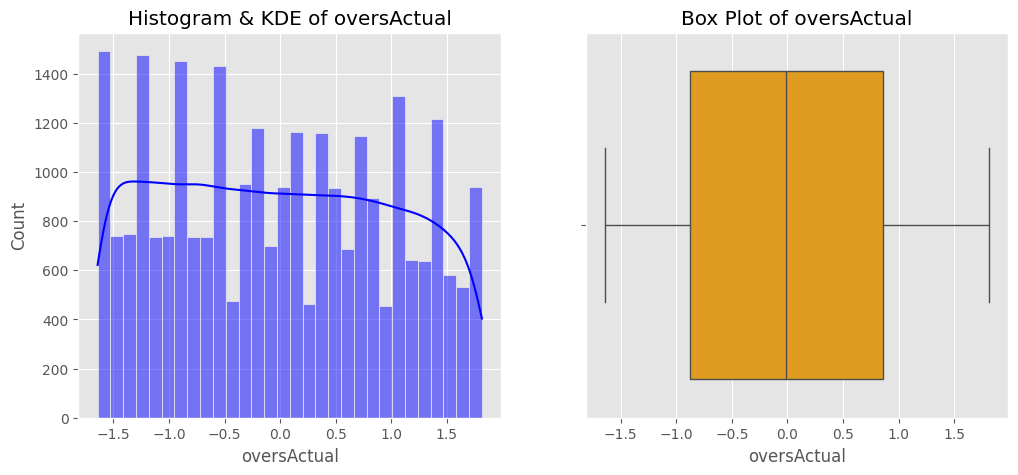

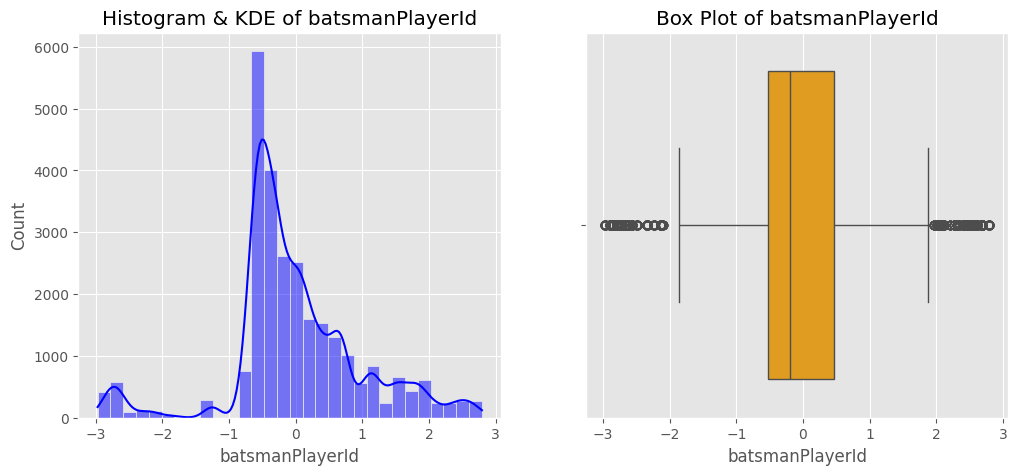

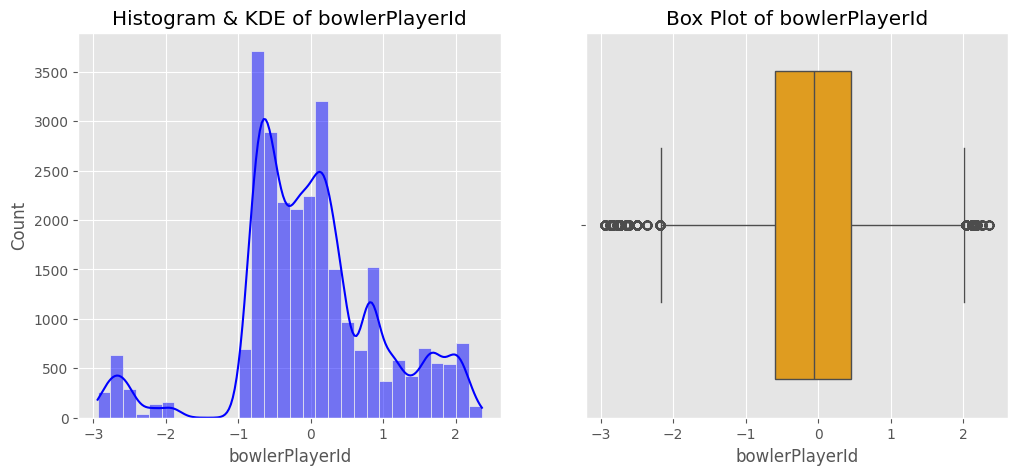

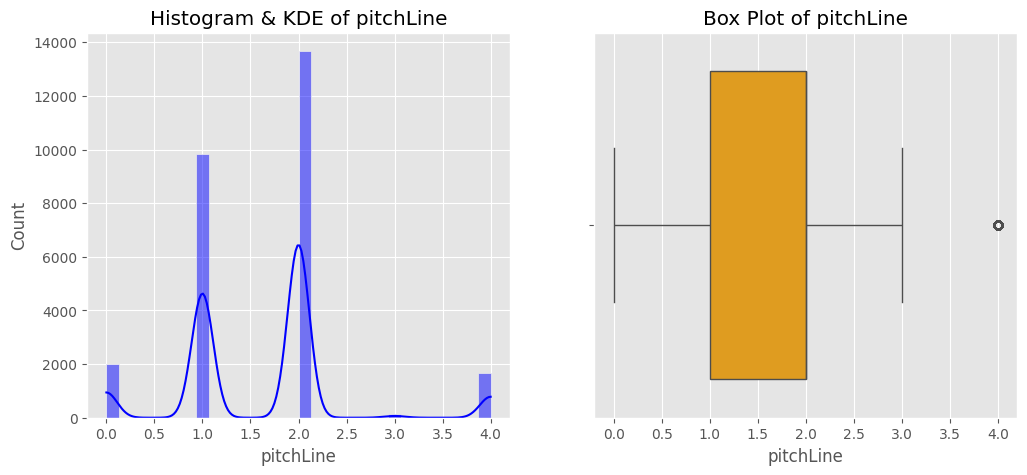

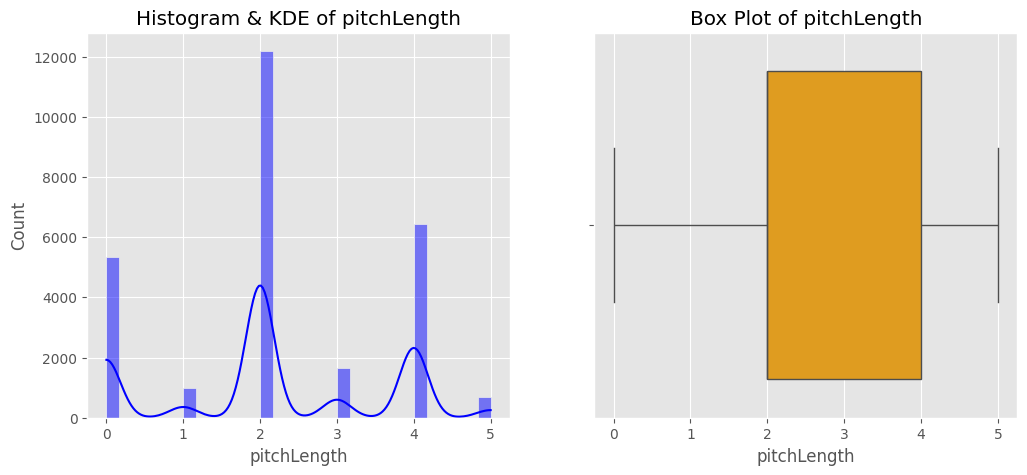

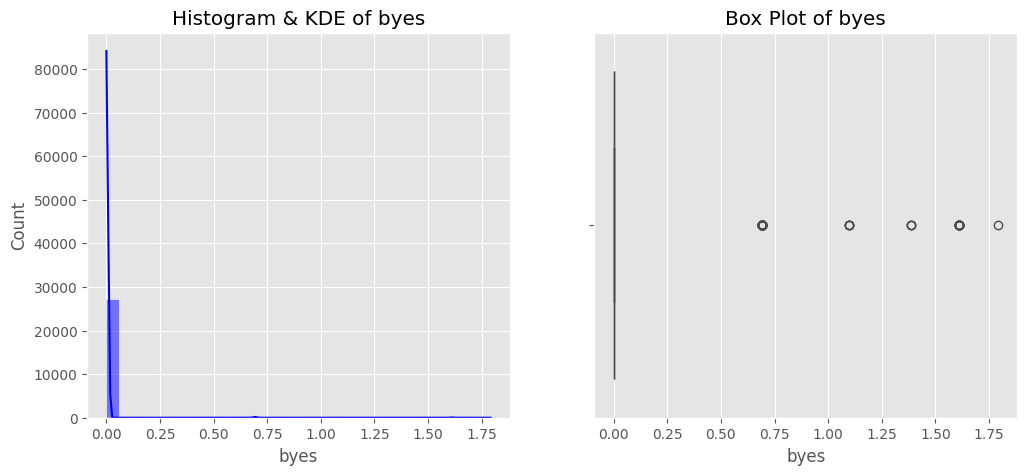

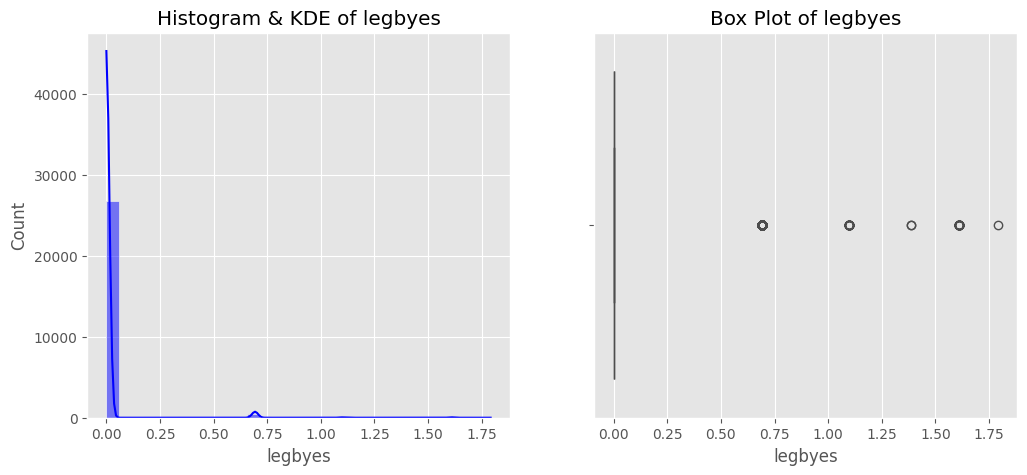

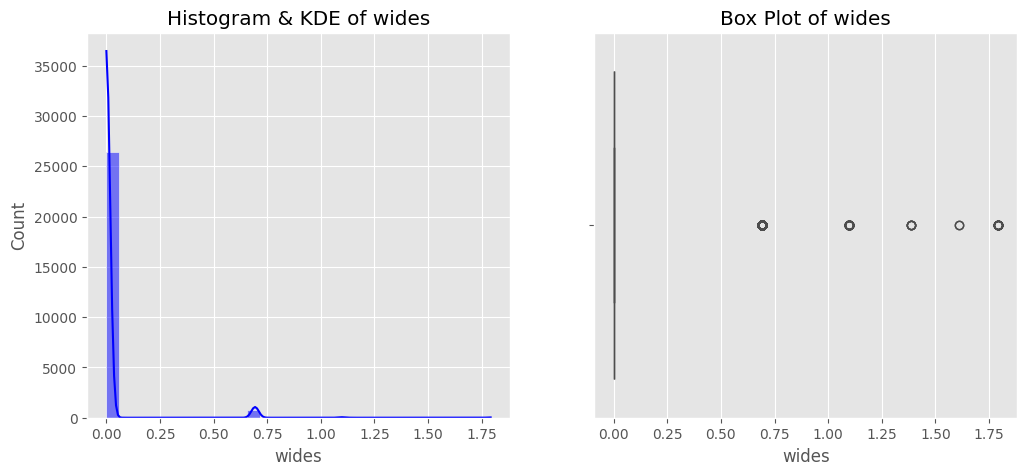

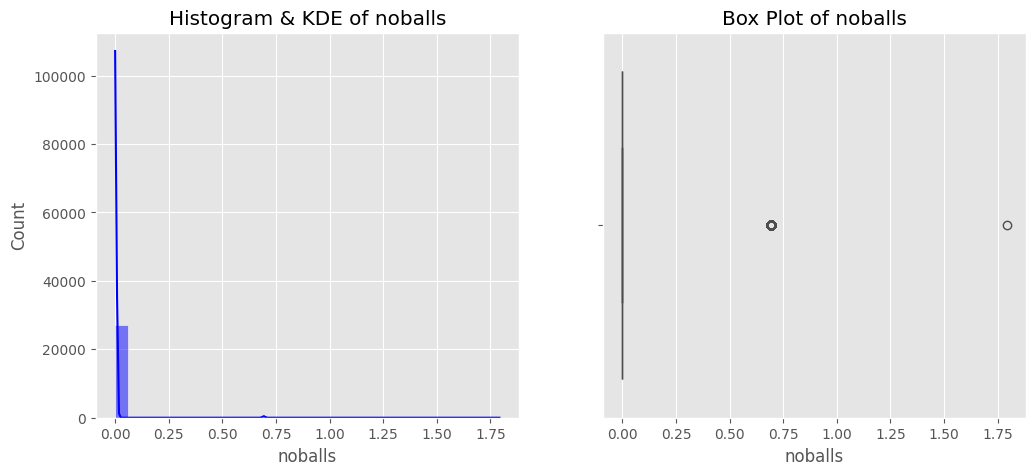

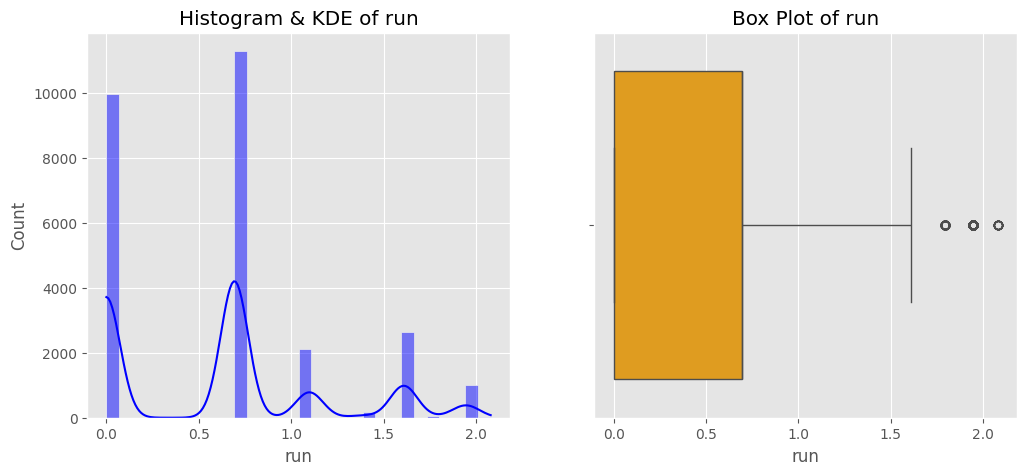

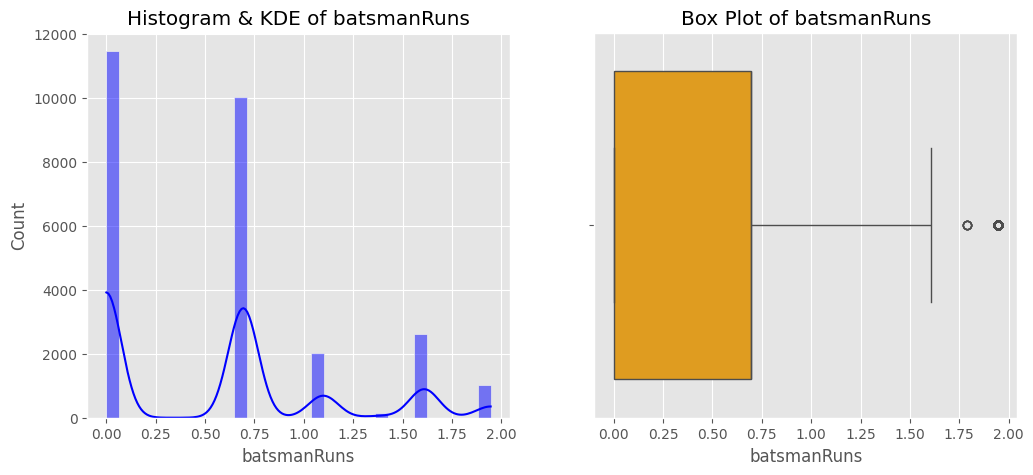

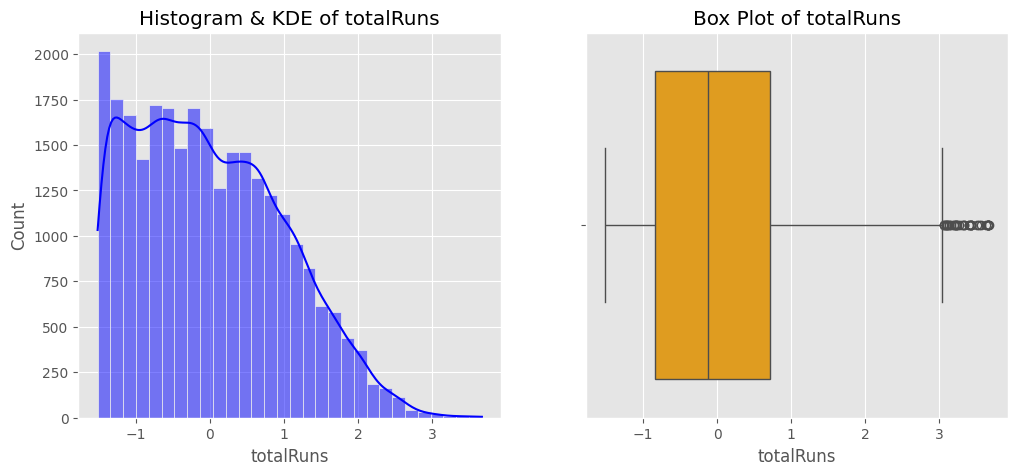

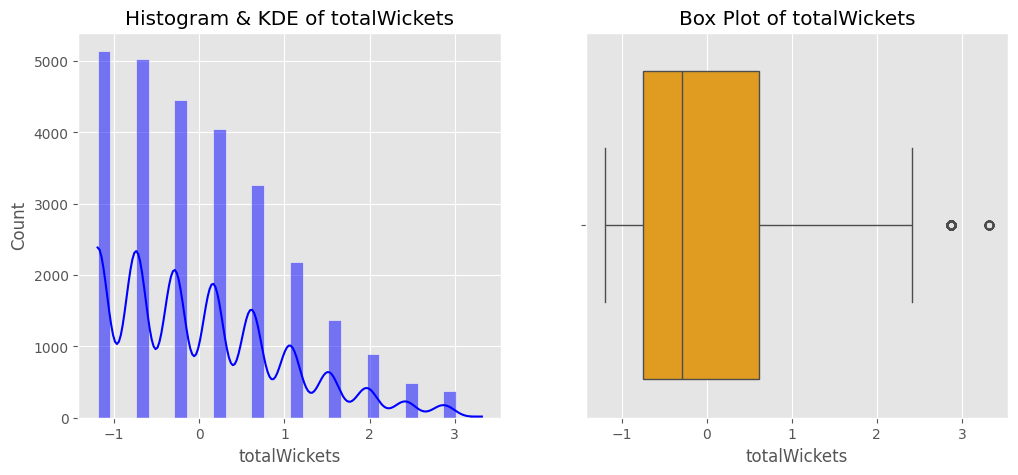

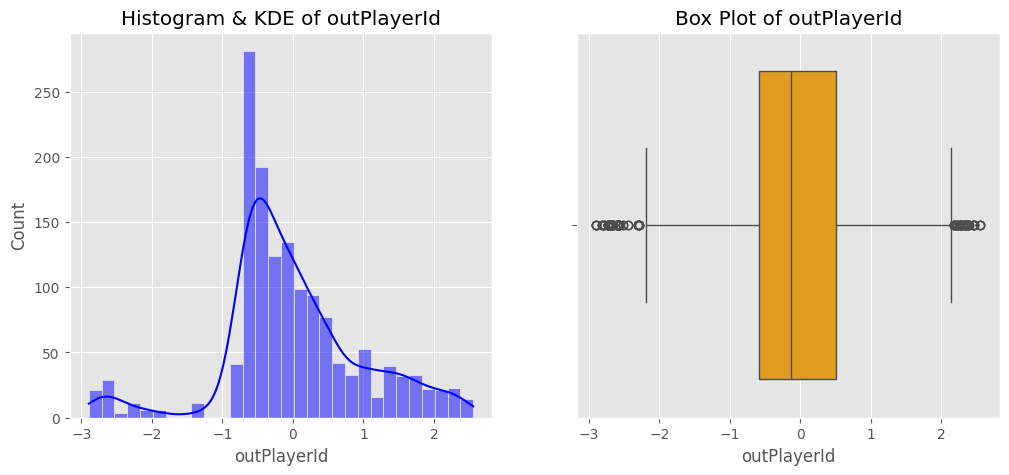

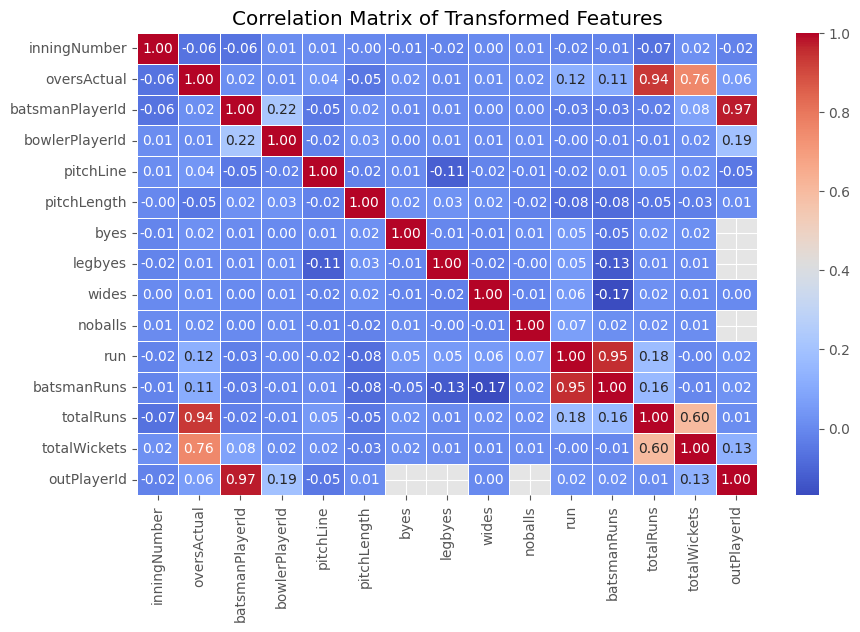

In [111]:
df_viz = df_transformed.copy()

numerical_cols = df_viz.select_dtypes(include=['number']).columns
categorical_cols = [col for col in df_viz.columns if col not in numerical_cols]

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_viz[col], bins=30, kde=True, color="blue")
    plt.title(f"Histogram & KDE of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_viz[col], color="orange")
    plt.title(f"Box Plot of {col}")

    plt.show()

if len(numerical_cols) <= 5:
    sns.pairplot(df_viz[numerical_cols], diag_kind="kde", corner=True)
    plt.show()

plt.figure(figsize=(10, 6))
corr_matrix = df_viz[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Transformed Features")
plt.show()


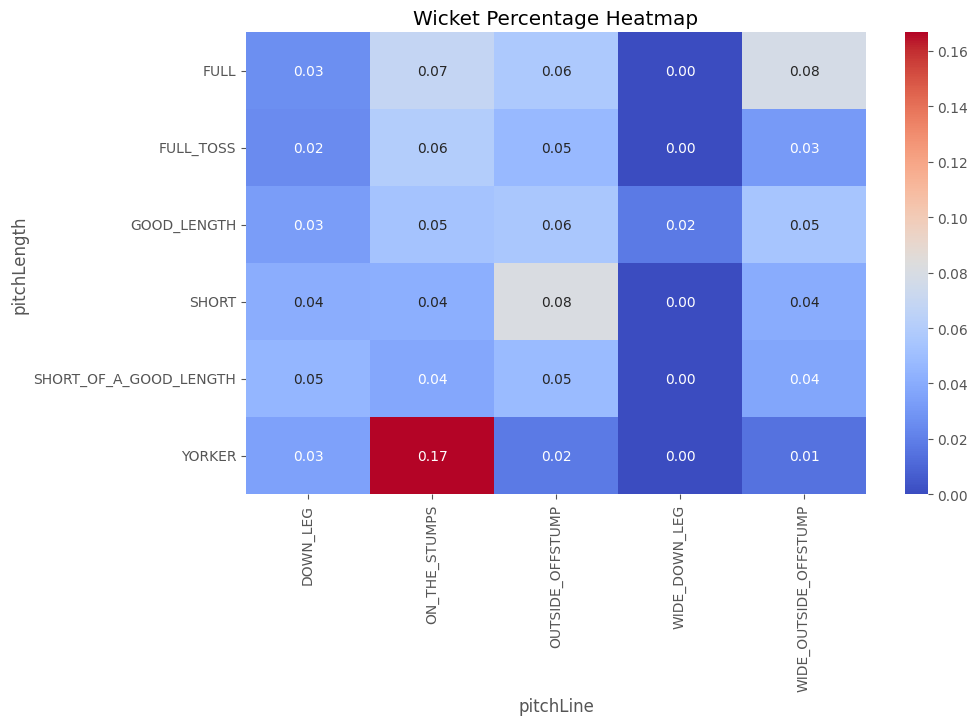

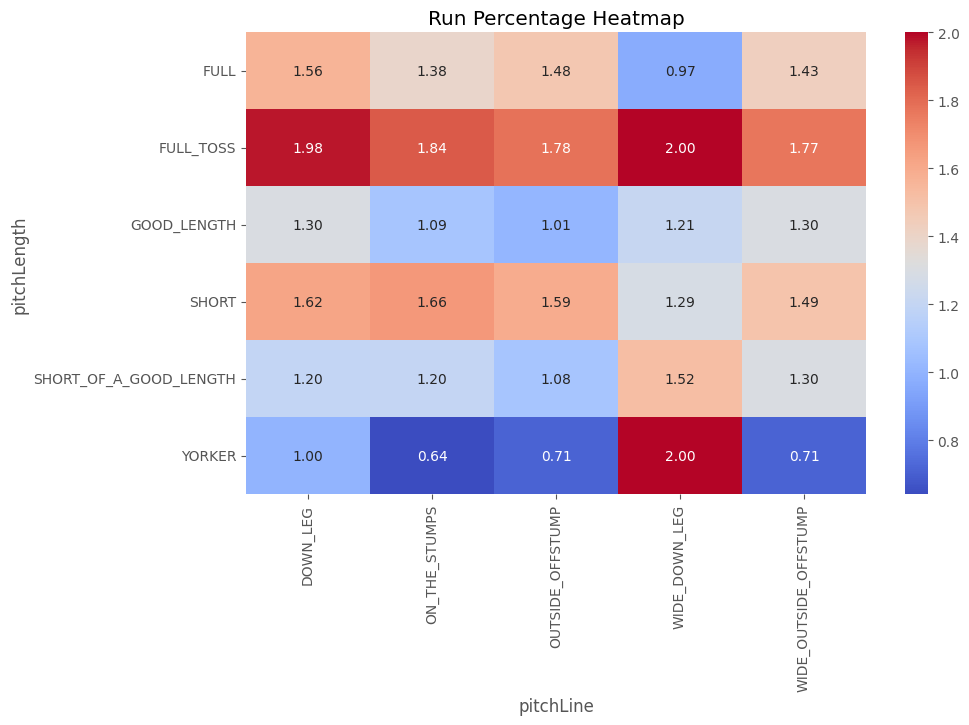

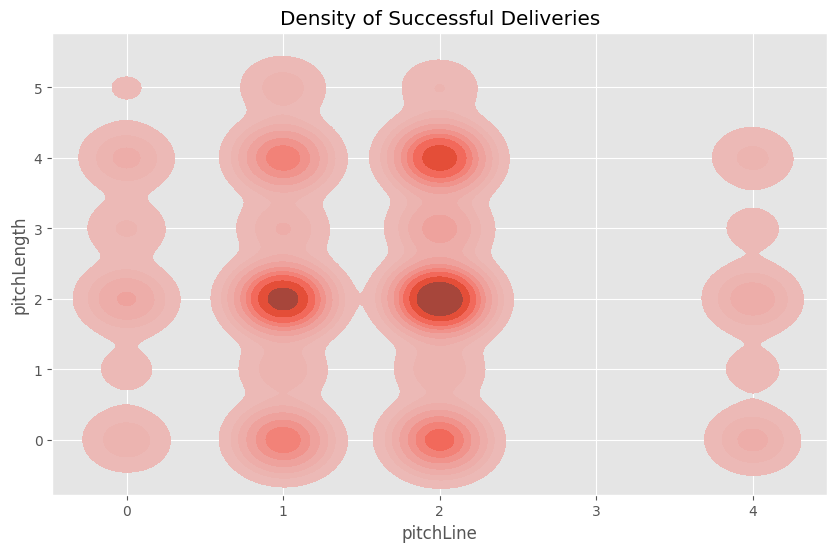

In [112]:
pivot_wicket = df_cleaned.pivot_table(index='pitchLength', columns='pitchLine', values='isWicket', aggfunc='mean')
pivot_run = df_cleaned.pivot_table(index='pitchLength', columns='pitchLine', values='run', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_wicket, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Wicket Percentage Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_run, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Run Percentage Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_transformed, x='pitchLine', y='pitchLength', fill=True)
plt.title('Density of Successful Deliveries')
plt.show()

<Figure size 1200x600 with 0 Axes>

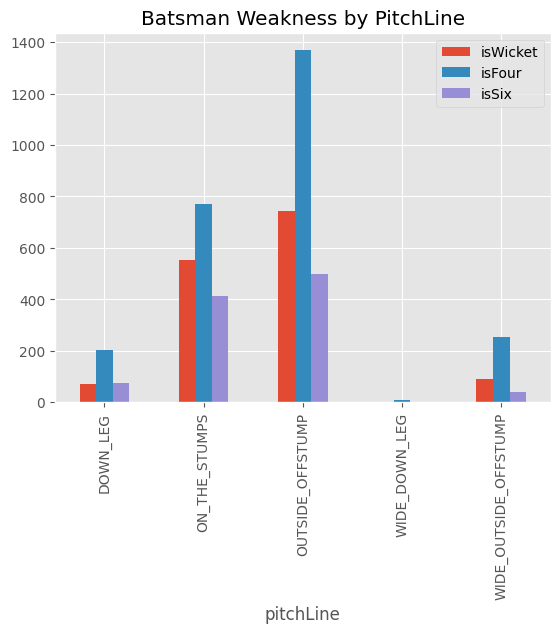

<Figure size 1200x600 with 0 Axes>

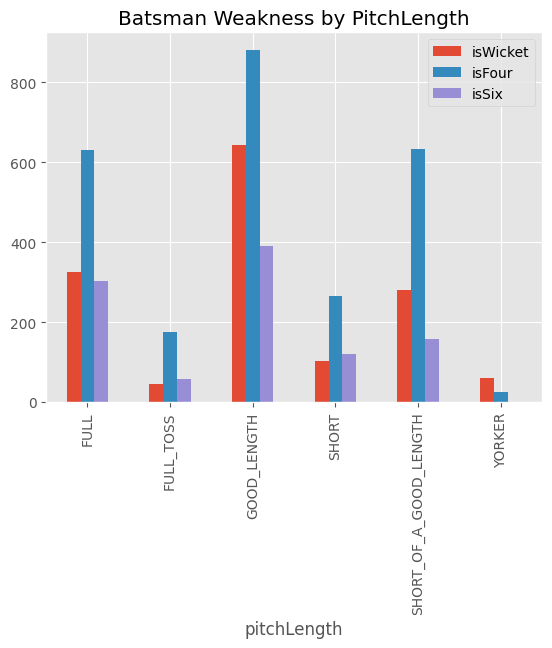

In [113]:
plt.figure(figsize=(12, 6))
df_grouped = df_cleaned.groupby(['pitchLine'])[['isWicket', 'isFour', 'isSix']].sum().reset_index()
df_grouped.plot(x='pitchLine', kind='bar', stacked=False)
plt.title('Batsman Weakness by PitchLine')
plt.show()

plt.figure(figsize=(12, 6))
df_grouped = df_cleaned.groupby(['pitchLength'])[['isWicket', 'isFour', 'isSix']].sum().reset_index()
df_grouped.plot(x='pitchLength', kind='bar', stacked=False)
plt.title('Batsman Weakness by PitchLength')
plt.show()

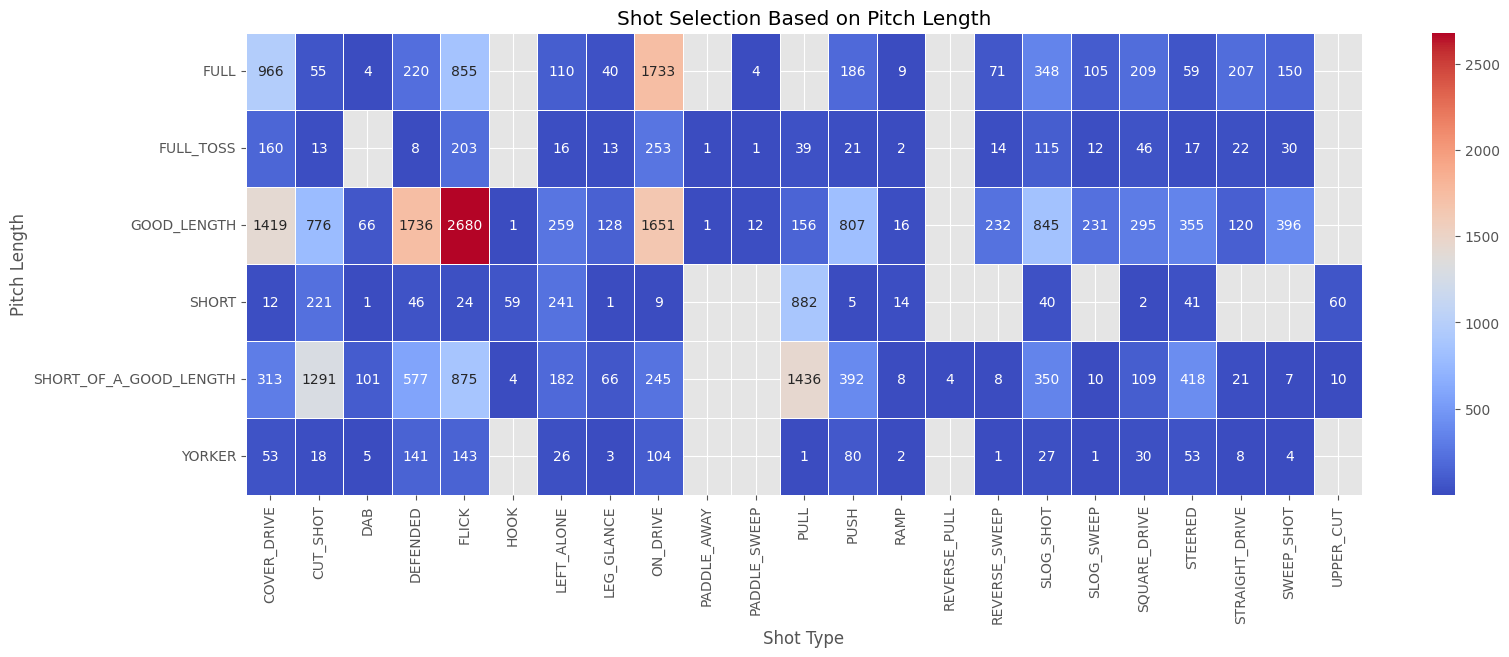

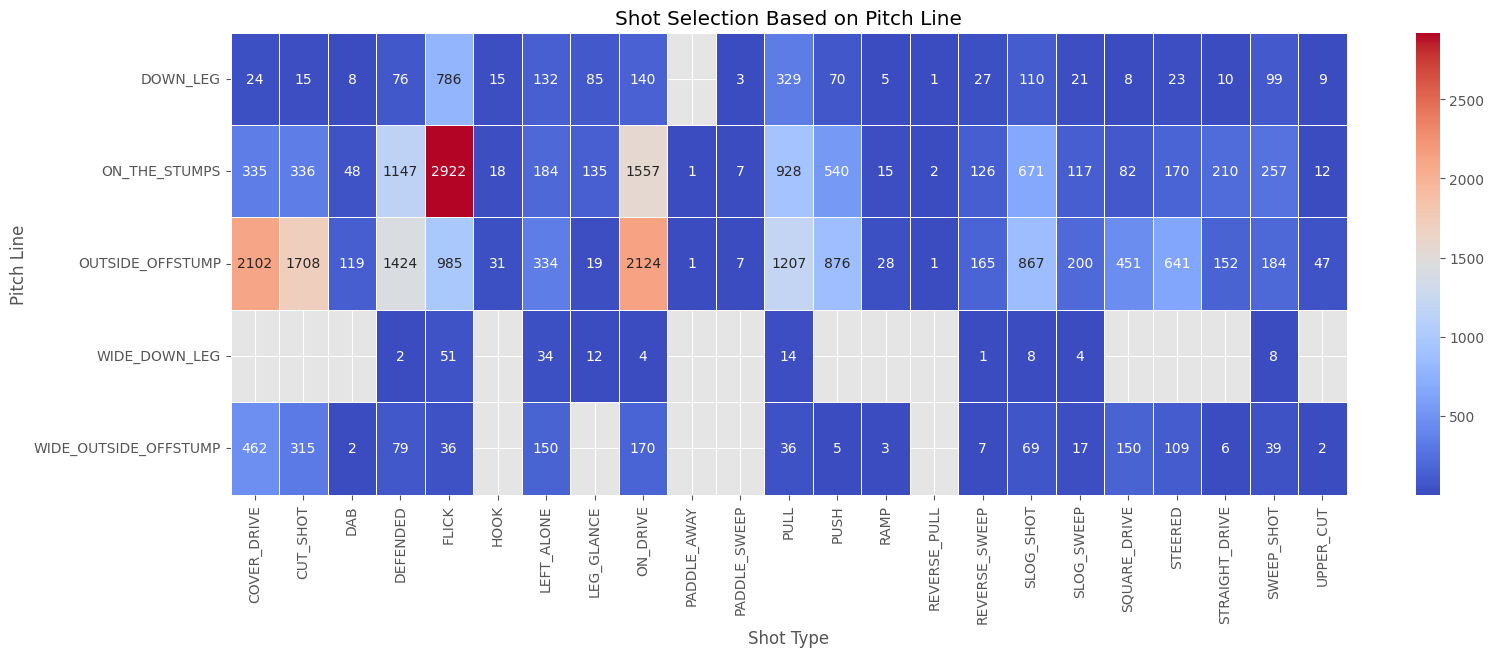

In [114]:
plt.figure(figsize=(18, 6))
pivot_shot_selection = df_cleaned.pivot_table(index='pitchLength', columns='shotType', values='run', aggfunc='count')
sns.heatmap(pivot_shot_selection, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Shot Selection Based on Pitch Length')
plt.xlabel('Shot Type')
plt.ylabel('Pitch Length')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(18, 6))
pivot_shot_selection = df_cleaned.pivot_table(index='pitchLine', columns='shotType', values='run', aggfunc='count')
sns.heatmap(pivot_shot_selection, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Shot Selection Based on Pitch Line')
plt.xlabel('Shot Type')
plt.ylabel('Pitch Line')
plt.xticks(rotation=90)
plt.show()